In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
police_allegations = pd.read_csv('../data/allegations_202007271729.csv', index_col=0)
police_allegations.head()

,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
unique_mos_id,,,,,,,,,,,,,,,,,,,,,
10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [3]:
police_allegations.describe()

,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,6451.608819,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,7945.641596,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,0.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,1089.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,3691.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,7155.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,31977.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [4]:
for col in police_allegations.columns: 
    print(col) 

first_name
last_name
command_now
shield_no
complaint_id
month_received
year_received
month_closed
year_closed
command_at_incident
rank_abbrev_incident
rank_abbrev_now
rank_now
rank_incident
mos_ethnicity
mos_gender
mos_age_incident
complainant_ethnicity
complainant_gender
complainant_age_incident
fado_type
allegation
precinct
contact_reason
outcome_description
board_disposition


In [5]:
police_allegations.complainant_gender.value_counts()

Male                     24058
Female                    5021
Not described               57
Transwoman (MTF)            20
Transman (FTM)               5
Gender non-conforming        2
Name: complainant_gender, dtype: int64

In [6]:
df = police_allegations[police_allegations.complainant_gender != 'Transwoman (MTF)']
df = police_allegations[police_allegations.complainant_gender != 'Transman (FTM)']
df = police_allegations[police_allegations.complainant_gender != 'Gender non-conforming']
df.head()

,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
unique_mos_id,,,,,,,,,,,,,,,,,,,,,
10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


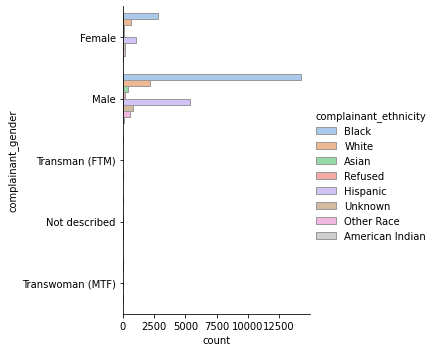

In [7]:

#sns.catplot(x="", kind="count", palette="ch:.25", data=police_allegations)

sns.catplot(y="complainant_gender", hue="complainant_ethnicity", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

### Inference:
It appears as though black male file far more complaints than other races and genders. 

### Exploring a Research question (important for your upcoming group project):
Why is this the case? Could this be because this sub-group tends to send more complaints about police officers or could this be because this sub-group is a marginalized group being targeted?

### Exploring Answers:
It is not yet answerable using correlation alone, but this raises an intriging human-centered question based on the data and analytics available to us to further explore. This is the type of question you should ask yourselves and explore in your assignment projects.

# Let's explore this sub-group a little further 

What if we looked at the typical age and the type of allegations made among this subgroup?

In [8]:

blackdf = police_allegations[police_allegations.complainant_ethnicity == 'Black']
blackdf_male = blackdf[blackdf.complainant_gender != 'Female']
blackdf_male.head()

,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
unique_mos_id,,,,,,,,,,,,,,,,,,,,,
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
10026,Brian,Alexander,079 DET,3185,35092,5,2016,10,2016,079 PCT,...,30,Black,Male,30.0,Abuse of Authority,Search (of person),79.0,Moving violation,No arrest made or summons issued,Unsubstantiated
10026,Brian,Alexander,079 DET,3185,26353,8,2012,2,2014,079 PCT,...,27,Black,Male,35.0,Force,Pepper spray,79.0,PD suspected C/V of violation/crime - street,Arrest - OGA,Unsubstantiated


<AxesSubplot:xlabel='count', ylabel='complainant_gender'>

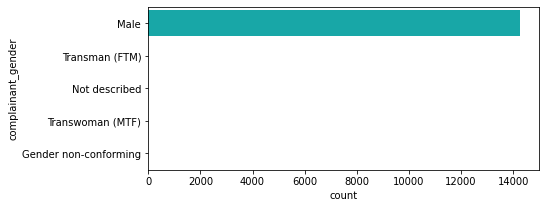

In [12]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="complainant_gender", data=blackdf_male, color="c")

<AxesSubplot:xlabel='count', ylabel='outcome_description'>

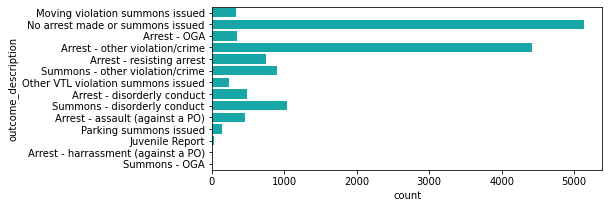

In [9]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="outcome_description", data=blackdf_male, color="c")

### Can we see any kinds of correlation within this subgroup to help us further?

### Exploring Possible Research Questions:
Perhaps particular Precincts are more prejudice. Could we explore whether there is any correlation between the Police Precinct and the allegations at hand toward this sub-group?

In [10]:
cor = blackdf_male['complainant_age_incident'].corr(blackdf_male['precinct'])
print(cor)

-0.0632917866030514


### Exploring Possible Inferences
As we can see, there is a very weak negative correlation between the complainants age and the Police Precinct. Thus these variables do not have a strong correlation and inferences cannot be made with these variables. In your projects, you may arrive at such conclusions. To this point, we urge you to continue playing with different variables and seeing what open-ended human-centered research questions you can come up with. Your research questions and inferences are far more important than the answers because as data science students, the exploration of your research questions will drive you in this project.